In [1]:
from fourier_analysis import FourierAnalysis, make_gaussian_random_field
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
# Parameters for the Gaussian random field
l_min1 = 10.0
l_min2 = 30.0
l_max = 200.0
alpha = -11.0 / 3.0
f_rms = 10.0  # normalization of the field

In [3]:
# Parameters for the box and grid
le = np.array([0.0, 0.0, 0.0])
re = np.array([750.0, 750.0, 750.0])
ddims = [256] * 3
width = re - le

In [4]:
# This makes a Gaussian random field with the specified power spectrum
v1 = make_gaussian_random_field(le, re, ddims, l_min1, l_max, alpha, f_rms, seed=10)
# Make another field with a different dissipation scale
v2 = make_gaussian_random_field(le, re, ddims, l_min2, l_max, alpha, f_rms, seed=10)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


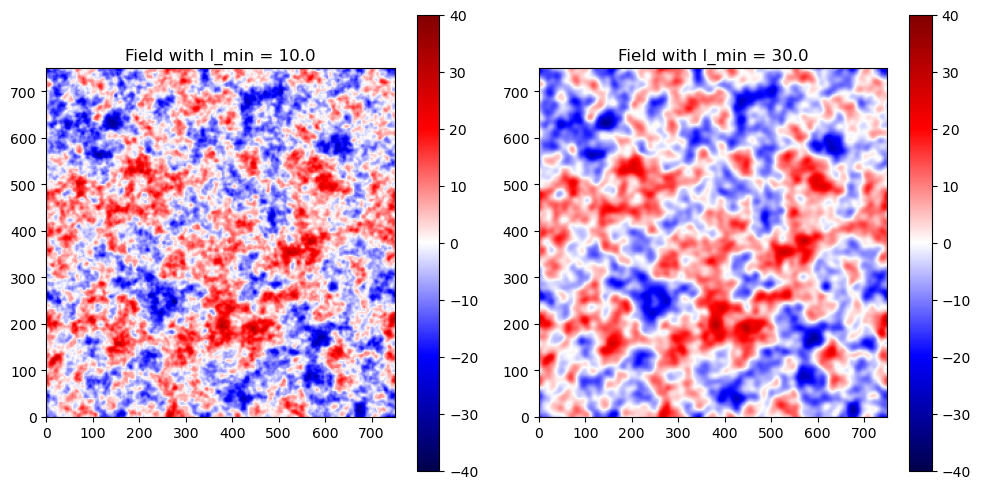

In [5]:
# Plot the slices of the two fields to see the difference
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
extent = (le[0], re[0], le[1], re[1])
im1 = ax[0].imshow(
    v1[:, :, ddims[2] // 2],
    origin="lower",
    extent=extent,
    cmap="seismic",
    vmin=-40.0,
    vmax=40.0,
)
ax[0].set_title("Field with l_min = {}".format(l_min1))
fig.colorbar(im1, ax=ax[0])
im2 = ax[1].imshow(
    v2[:, :, ddims[2] // 2],
    origin="lower",
    extent=extent,
    cmap="seismic",
    vmin=-40.0,
    vmax=40.0,
)
ax[1].set_title("Field with l_min = {}".format(l_min2))
fig.colorbar(im2, ax=ax[1])
plt.tight_layout()
plt.show()

In [6]:
# This is the width of the grid on a side (here in kpc, but could be anything)
W = np.array([750.0] * 3)

In [7]:
# This is a class I wrote to simplify stuff
fa = FourierAnalysis(W, ddims)

In [8]:
# Get the power spectrum of each spatial component
nbins = 60  # Number of bins for the power spectrum, it will
# use the min-max wavenumbers as boundaries
k1, Pk1 = fa.make_powerspec(v1, nbins)
k2, Pk2 = fa.make_powerspec(v2, nbins)

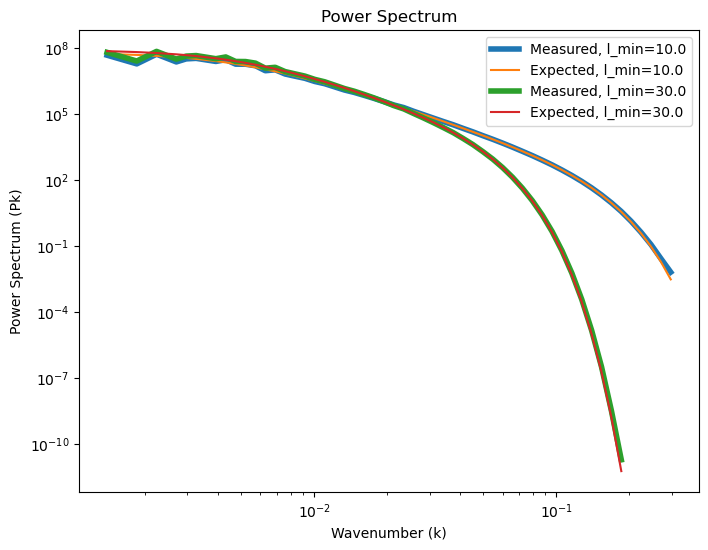

In [9]:
# Now let's plot both the expected and computed power spectra
def P(k, l_max, l_min, alpha):
    sigma = (1.0 + (k * l_max) ** 2) ** (0.25 * alpha) * np.exp(-0.5 * (k * l_min) ** 2)
    return sigma * sigma


def E(k, l_max, l_min, alpha):
    return 4.0 * np.pi * P(k, l_max, l_min, alpha) * k * k


Cn1 = (
    f_rms**2
    / quad(E, 0.0, 100.0, points=(0.1, 1.0, 10.0, 30.0), args=(l_max, l_min1, alpha))[0]
)
Cn2 = (
    f_rms**2
    / quad(E, 0.0, 100.0, points=(0.1, 1.0, 10.0, 30.0), args=(l_max, l_min2, alpha))[0]
)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.loglog(k1, Pk1, label="Measured, l_min={}".format(l_min1), lw=4)
ax.loglog(
    k1, Cn1 * P(k1, l_max, l_min1, alpha), label="Expected, l_min={}".format(l_min1)
)
ax.loglog(k2, Pk2, label="Measured, l_min={}".format(l_min2), lw=4)
ax.loglog(
    k2, Cn2 * P(k2, l_max, l_min2, alpha), label="Expected, l_min={}".format(l_min2)
)
ax.set_xlabel("Wavenumber (k)")
ax.set_ylabel("Power Spectrum (Pk)")
ax.set_title("Power Spectrum")
ax.legend()